In [1]:
import os
os.unlink('tweets.json')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'tweets.json'

In [15]:
import tweepy

In [16]:
from tweepy import Stream
from tweepy import StreamListener
from tweepy import OAuthHandler

In [17]:
## put keys here

consumer_key = "LRoxOwLNIBwxtCK59CWmqUsSV"
consumer_secret = "NHIXVqfIJ3jW40t4sWAR66k7kaw2sboJqAg6fwdOpUkxidlsWK" 

access_token = "1034315062088003584-rJaSMEccfyefHsXQK4Uwh31Icu02hu" 
access_secret ="ydVlSrmdnufUvBBSZoTKs4IeeVrUApIGMfkyV57uG0dHb" 

In [18]:
class DataFetch(StreamListener):
    def on_data(self,tweet):
        #print(tweet)
        fp = open("tweets.json","a")
        fp.write(tweet)
        fp.close()
    def on_error(self,error):
        print(f"\n\nError!!!!{error}\n\n")
    

In [19]:
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [20]:
fetch = DataFetch()

In [ ]:
stream = Stream(auth,fetch)
stream.filter(track=[ "cricket", "dhoni", "jadeja" ])

In [1]:
fp = open("tweets.json")

In [2]:
one = fp.readline()

In [3]:
one[:100]

'{"created_at":"Fri Jul 19 11:49:33 +0000 2019","id":1152183692950945792,"id_str":"115218369295094579'

In [4]:
import json 

In [5]:
d = json.loads(one)

In [6]:
print(type(d))

<class 'dict'>


In [7]:
print(*d.keys(),sep='\n')

created_at
id
id_str
text
source
truncated
in_reply_to_status_id
in_reply_to_status_id_str
in_reply_to_user_id
in_reply_to_user_id_str
in_reply_to_screen_name
user
geo
coordinates
place
contributors
retweeted_status
is_quote_status
quote_count
reply_count
retweet_count
favorite_count
entities
favorited
retweeted
filter_level
lang
timestamp_ms


In [8]:
d['text']

'RT @SRazaB24: How one decision has made a team , strangers\nHow one decision has made so many people unemployed \nHow one decision effect so…'

In [9]:
d['user']['name']

'Krishna murthy'

In [10]:
d['lang']

'en'

In [11]:
d['place']

In [12]:
# d['place']['country']

In [13]:
fp.seek(0)

0

In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

hash_tags = []
language = []
nations = []
fp.seek(0)
for line in fp :
    try : 
        d = json.loads(line)
        lang = d['lang']
        language.append(lang)
        if d['place'] : 
            country = d['place']['country']
        else : 
            country = np.nan
        nations.append(country)
        tw = d['text'].split()
        if tw :
            for h in tw : 
                if "#" in h : 
                    hash_tags.append(h)
    except Exception as e : 
        continue 

In [15]:
len(language)

421

In [16]:
len(nations)

421

In [17]:
len(hash_tags)

272

In [18]:
language[:5]

['en', 'en', 'en', 'en', 'ta']

In [19]:
hash_tags[:5]

['#Dhoni', '#SharonPly', '#iamstrongest', '#ICC', '#Cricket']

(0, 10)

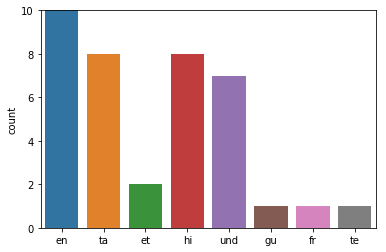

In [20]:
sns.countplot(language)
plt.ylim([0,10])

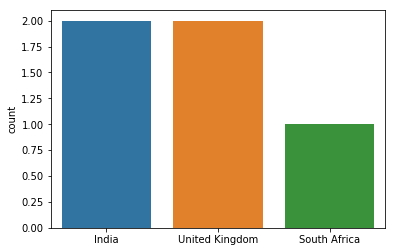

In [21]:
sns.countplot(nations)

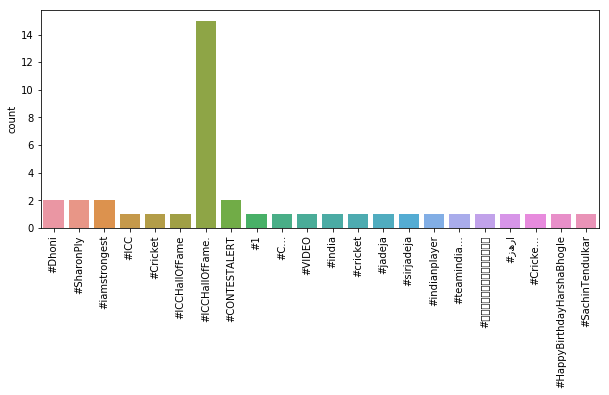

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(hash_tags[:40])
plt.xticks(rotation=90)
plt.show()